In [4]:
import numpy as np

class Neuron:
    def __init__(self, nb_inputs:int, activation, grad_activation):
        self.biais = np.random.randn() * 0.1
        self.weights = self.weights = np.random.randn(nb_inputs)
        self.activation = activation
        self.grad_activation = grad_activation
        self.grad_biais = 0
        self.grad_weight = np.zeros(nb_inputs)

    
    def somme(self, x):
        return np.dot(self.weights, x) + self.biais
        
    def loss(self, x, target):
        y = self.forward(x)
        return (target - y)**2

    def forward(self, x):
        return self.activation(self.somme(x))
    
    def backward(self, x, target):
        y = self.forward(x)
        z = self.somme(x)
        self.grad_biais = -2*(target - y) * (self.grad_activation(z))
        self.grad_weight = self.grad_biais * x

    def update(self, learning_rate:float):
        self.weights -= learning_rate * self.grad_weight
        self.biais -= learning_rate * self.grad_biais


    
    def __str__(self):
        return f"Neurone\nbiais: {self.biais}\nactivation: {self.activation}\n poids: {self.weights}"


def ReLU(x):
    return max(0, x)

def grad_ReLU(x):
    return float(x>0)

def LeakyReLU(x):
    return x if x > 0 else 0.01 * x

def grad_LeakyReLU(x):
    return 1.0 if x > 0 else 0.01

def sigmoid(x):
    return 1/(1+np.exp(-x))

def grad_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))


In [5]:
class Layer:
    def __init__(self, neurons:list[Neuron]):
        self.neurons = neurons

    def forward(self, x):
        return [n.forward(x) for n in self.neurons]

    def backward(self, x, targets):
        for i, n in enumerate(self.neurons):
            n.backward(x, targets[i])

    def update(self, learning_rate):
        for n in self.neurons:
            n.update(learning_rate)

    def loss(self, x, targets):
        y = self.forward(x)
        return np.mean((targets - y)**2)

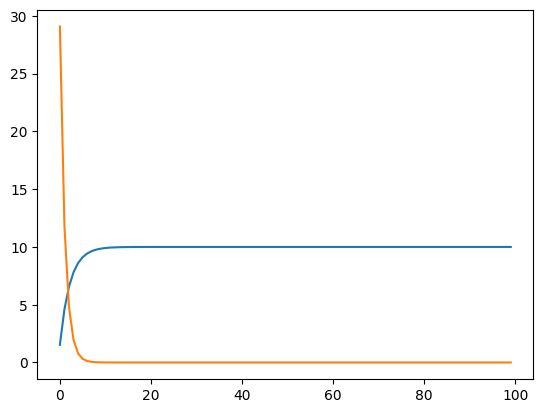

In [6]:
import matplotlib.pyplot as plt

n = Neuron(3, ReLU, grad_ReLU)
x = np.random.randn(3)
target = 10
learning_rate = 0.1
ys = []
losses = []
for i in range(100):
    y = n.forward(x)
    n.backward(x, target)
    n.update(learning_rate)
    ys.append(y)
    losses.append(n.loss(x, target))

plt.plot(ys)
plt.plot(losses)


Epoch 1 - Outputs: [0.004421439112046205, 0.07963041966335455, 1.6107515078363501, 1.2551967134921382] - Loss 35.15593637003851
Epoch 2 - Outputs: [0.601372909213707, 0.37348253002729176, 1.693719584639694, 1.5982852847474947] - Loss 31.08219157553678
Epoch 3 - Outputs: [1.1626735107352428, 0.6497853361457884, 1.7717326790858319, 1.9208840738718438] - Loss 27.480497830281838
Epoch 4 - Outputs: [1.6904523688973363, 0.9095869097142205, 1.8450867104139, 2.224216762465071] - Loss 24.29615553861031
Epoch 5 - Outputs: [2.186711454256959, 1.1538727299591527, 1.9140599251066495, 2.5094339519621127] - Loss 21.480803499340773
Epoch 6 - Outputs: [2.653333176581298, 1.3835694217577525, 1.9789139523348949, 2.7776175280938666] - Loss 18.991684435178065
Epoch 7 - Outputs: [3.0920875252037456, 1.5995482705109085, 2.0398947963691825, 3.0297847646957203] - Loss 16.79099562995648
Epoch 8 - Outputs: [3.504638782946739, 1.8026285271026712, 2.097233769723093, 3.2668921824302632] - Loss 14.845314811728237
Ep

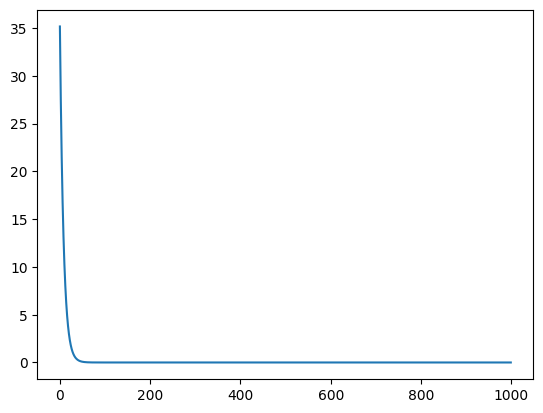

In [9]:
neurons = [Neuron(nb_inputs=3, activation=LeakyReLU, grad_activation=grad_LeakyReLU) for _ in range(4)]

layer = Layer(neurons)

x = np.random.randn(3)

targets = np.array([10, 5, 3, 7])

learning_rate = 0.01
losses = []
for epoch in range(1000):
    outputs = layer.forward(x)
    layer.backward(x, targets)
    layer.update(learning_rate)
    loss = layer.loss(x, targets)
    losses.append(loss)
    print(f"Epoch {epoch+1} - Outputs: {outputs} - Loss {loss}")
print(f"targets: {targets}")
plt.plot(losses)